Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 512, 512, 128)     3584      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 256, 256, 128)     147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 128, 128, 32)      36896     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 32)       

1/1 [==============================] - 3s 3s/step - loss: 0.0023 - accuracy: 0.7755
Epoch 48/200
1/1 [==============================] - 2s 2s/step - loss: 0.0024 - accuracy: 0.8139
Epoch 49/200
1/1 [==============================] - 2s 2s/step - loss: 0.0025 - accuracy: 0.8530
Epoch 50/200
1/1 [==============================] - 2s 2s/step - loss: 0.0021 - accuracy: 0.8694
Epoch 51/200
1/1 [==============================] - 1s 1s/step - loss: 0.0021 - accuracy: 0.8728
Epoch 52/200
1/1 [==============================] - 2s 2s/step - loss: 0.0024 - accuracy: 0.8744
Epoch 53/200
1/1 [==============================] - 2s 2s/step - loss: 0.0024 - accuracy: 0.8747
Epoch 54/200
1/1 [==============================] - 2s 2s/step - loss: 0.0022 - accuracy: 0.8743
Epoch 55/200
1/1 [==============================] - 2s 2s/step - loss: 0.0019 - accuracy: 0.8661
Epoch 56/200
1/1 [==============================] - 2s 2s/step - loss: 0.0022 - accuracy: 0.8364
Epoch 57/200
1/1 [=========================

1/1 [==============================] - 1s 1s/step - loss: 9.7250e-04 - accuracy: 0.8667
Epoch 132/200
1/1 [==============================] - 1s 1s/step - loss: 9.6363e-04 - accuracy: 0.8670
Epoch 133/200
1/1 [==============================] - 2s 2s/step - loss: 9.6454e-04 - accuracy: 0.8675
Epoch 134/200
1/1 [==============================] - 1s 1s/step - loss: 9.5705e-04 - accuracy: 0.8664
Epoch 135/200
1/1 [==============================] - 1s 1s/step - loss: 9.4629e-04 - accuracy: 0.8668
Epoch 136/200
1/1 [==============================] - 1s 1s/step - loss: 9.4635e-04 - accuracy: 0.8677
Epoch 137/200
1/1 [==============================] - 1s 1s/step - loss: 9.4239e-04 - accuracy: 0.8677
Epoch 138/200
1/1 [==============================] - 2s 2s/step - loss: 9.3220e-04 - accuracy: 0.8692
Epoch 139/200
1/1 [==============================] - 2s 2s/step - loss: 9.2930e-04 - accuracy: 0.8700
Epoch 140/200
1/1 [==============================] - 2s 2s/step - loss: 9.2773e-04 - accuracy: 0

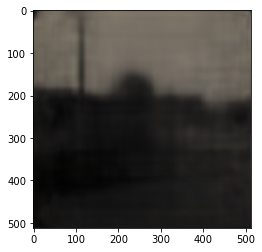

In [7]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
import matplotlib.pyplot as plt

SIZE=512  #Limiting to 512 size image 
img_data=[]

img=cv2.imread('P1.jpg', 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') /(SIZE-1)


img_data2=[]  #Second image to be provided as ground truth. 

img2=cv2.imread('P2.jpg', 1)   #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') /(SIZE-1)

#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

model.fit(img_array, img_array2,
        epochs=200,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch


print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw. 
imshow(pred[0].reshape(SIZE,SIZE,3))
plt.imsave('test.png',pred[0],cmap='autumn_r')

#img2 = image.fromarray(pred[0], 'RGB')
#img2.save("processed_img.jpg"


In [2]:
import cv2
img = cv2.imread('1.jpg')
print(img.shape)

(1024, 1224, 3)


100%|██████████| 84/84 [00:01<00:00, 77.16it/s]


Train on 84 samples
Epoch 1/10
84/84 [==============================] - 5s 59ms/sample - loss: 385085530815186304.0000
Epoch 2/10
84/84 [==============================] - 4s 47ms/sample - loss: 46419.0752
Epoch 3/10
84/84 [==============================] - 4s 48ms/sample - loss: 46037.2529
Epoch 4/10
84/84 [==============================] - 5s 54ms/sample - loss: 45758.3438
Epoch 5/10
84/84 [==============================] - 4s 48ms/sample - loss: 45775.2471
Epoch 6/10
84/84 [==============================] - 4s 48ms/sample - loss: 45619.4922
Epoch 7/10
84/84 [==============================] - 4s 47ms/sample - loss: 45614.8945
Epoch 8/10
84/84 [==============================] - 4s 52ms/sample - loss: 45552.0635
Epoch 9/10
84/84 [==============================] - 4s 49ms/sample - loss: 45502.9453
Epoch 10/10
84/84 [==============================] - 4s 50ms/sample - loss: 45464.5312


/home/killer/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


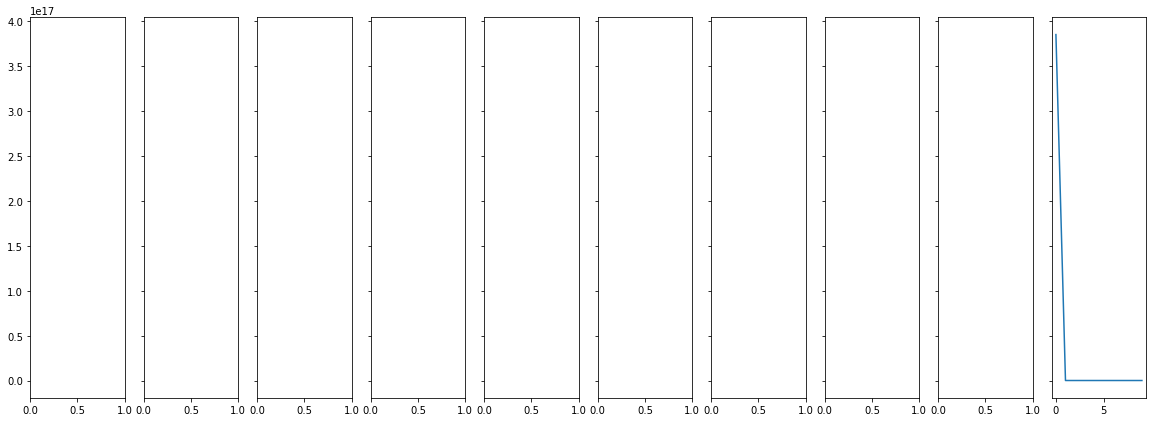

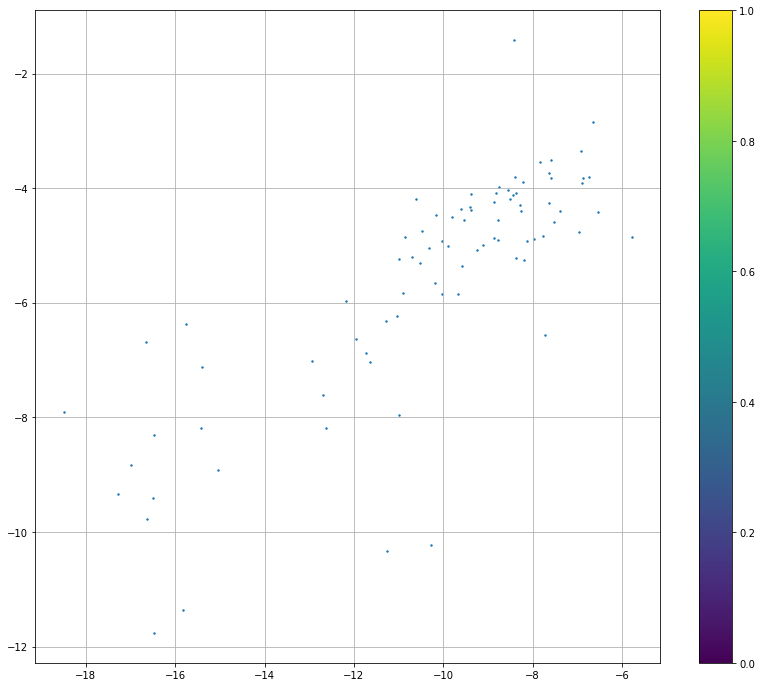

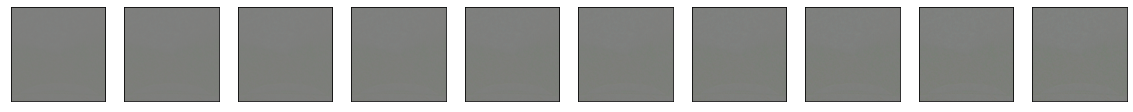

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf; tf.compat.v1.disable_eager_execution()
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Lambda, Reshape
from keras.models import Model
from keras.losses import binary_crossentropy
from keras.datasets import mnist
np.random.seed(25)
tf.executing_eagerly()

# A function to compute the value of latent space
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

# The loss function for VAE
def kl_reconstruction_loss(true, pred):
    # Reconstruction loss (binary crossentropy)
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height

    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)

# A function to display image sequence
def display_image_sequence(x_start, y_start, x_end, y_end, no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)
    
    x_axis = x_axis[:, np.newaxis]
    y_axis = y_axis[:, np.newaxis]
    
    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2],new_images.shape[3])
    
    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(20, 7))
    counter = 0
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='gray')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()

# Loading dataset
SIZE=256
from tqdm import tqdm
img_data=[]
path1 = 'Scene/F'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') /(SIZE-1)
X_train = img_array

# Displaying 120th to 129th data
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(20, 7))
counter = 0

# Normalize values such that all numbers are within
# the range of 0 to 1

# Convert from (no_of_data, 28, 28) to (no_of_data, 28, 28, 1)
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)


# Defining some variables
img_height   = X_train_new.shape[1]    # 28
img_width    = X_train_new.shape[2]    # 28
num_channels = X_train_new.shape[3]    # 1
input_shape =  (img_height, img_width, num_channels)   # (28,28,1)
latent_dim = 2    # Dimension of the latent space


# Constructing encoder
encoder_input = Input(shape=input_shape)

encoder_conv = Conv2D(filters=8, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=16, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=32, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=64, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder = Flatten()(encoder_conv)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])

# Take the convolution shape to be used in the decoder
conv_shape = K.int_shape(encoder_conv)

# Constructing decoder
decoder_input = Input(shape=(latent_dim,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)
decoder_conv = Conv2DTranspose(filters=64, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=32, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=16, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=8, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
                          padding='same', activation='sigmoid')(decoder_conv)

# Actually build encoder, decoder and the entire VAE
encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)
vae = Model(encoder_input, decoder(encoder(encoder_input)))

# Compile the model using KL loss
vae.compile(optimizer='adam', loss=kl_reconstruction_loss)

# Training VAE
history = vae.fit(x=X_train_new, y=X_train_new, epochs=10, batch_size=21)

# Plotting loss value decrease
plt.plot(history.history['loss'])


# Transform images to points in latent space using encoder
encoded = encoder.predict(X_train_new)

# Displaying images in latent space
plt.figure(figsize=(14,12))
plt.scatter(encoded[:,0], encoded[:,1], s=2, cmap='hsv')
plt.colorbar()
plt.grid()
plt.show()

# Displaying several new images
#Starting point=(0,2), end point=(2,0)

display_image_sequence(encoded[10,0],encoded[10,1],encoded[12,0],encoded[12,1],10)


-12.9352455 -7.012969 -6.9183064 -3.3579803
84 256 256


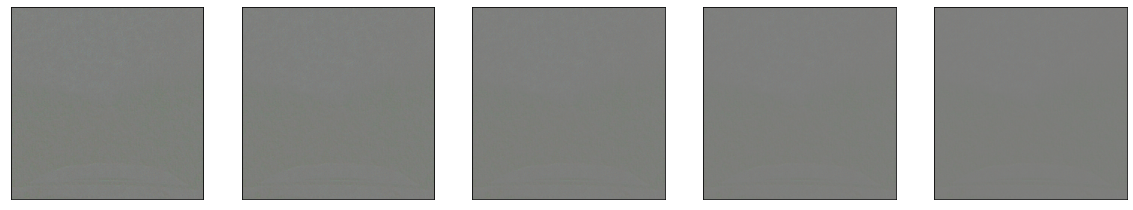

In [8]:
print(encoded[0,0],encoded[0,1],encoded[2,0],encoded[2,1])
print(X_train_new.shape[0], X_train_new.shape[1],X_train_new.shape[2])
display_image_sequence(encoded[12,0],encoded[12,1],encoded[30,0],encoded[30,1],5)

In [9]:
print(encoded[10,0],encoded[10,1],encoded[12,0],encoded[12,1])

-8.872983 -4.8679724 -16.6447 -6.6897893


In [11]:
print(encoded[0,0],encoded[0,1],encoded[2,0],encoded[2,1])

-12.9352455 -7.012969 -6.9183064 -3.3579803
